### Data Dictionary

Merge 2011 and 2013 dataset based on VALUE. **Note due to memory error, use 2011 dataset alone to predict value**

Using data on ‘Single Family Housing’. TYPE = 1 and STRUCTURETYPE = 1

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score
from sklearn.metrics import auc, f1_score, precision_score, recall_score, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

import pickle
from pickle import dump, load

np.random.seed(0)

pd.set_option('display.max_columns',100)
#pd.set_option('display.max_rows',100)
pd.set_option('display.width', 1000)

### Data Exploration and Analysis

In [2]:
df1 = pd.read_csv("2011.csv")

In [3]:
df1

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,IPOV,PER,ZINC2,ZADEQ,ZSMHC,STATUS,BEDRMS,BUILT,TYPE,VALUE,NUNITS,ROOMS,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED
0,'036000001146',34,2,4,84200,2580,17849,3,159972,1,4240,1,4,2002,1,720000,1,8,1,1,300.000000,248.333333,5333.420736,8113.742961,6203.127772,5026.613323,-9
1,'036000001147',43,2,4,84200,2241,22629,4,156772,1,3502,1,3,2002,1,550000,1,5,1,1,256.000000,362.500000,4273.775100,6397.632355,4938.134641,4039.408326,-9
2,'036000001149',60,2,4,84200,2577,17399,3,1488496,1,5014,1,5,2001,1,720000,1,11,1,1,233.000000,180.000000,5198.087403,7978.409628,6067.794439,4891.279990,-9
3,'036000001150',37,2,4,84200,2241,14985,2,124944,1,4609,1,3,2001,1,450000,1,5,1,1,152.000000,290.000000,3432.679627,5170.381018,3976.246524,3240.924994,-9
4,'036000001151',33,2,4,84200,2580,22557,4,149972,1,4891,1,4,1995,1,700000,1,9,1,1,656.166667,181.666667,5490.001642,8193.092694,6335.550149,5191.716657,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145526,'999900022229',30,1,3,69100,891,17960,3,800,1,543,1,2,2010,1,-6,1,5,1,2,142.500000,0.000000,543.000000,543.000000,543.000000,543.000000,0
145527,'999900022230',80,1,4,74900,1406,17504,3,67000,1,301,1,2,1920,1,-6,1,4,1,2,62.000000,5.583333,301.000000,301.000000,301.000000,301.000000,0
145528,'999900022231',56,3,4,67985,1615,23524,4,66982,1,1622,1,3,1950,1,350000,1,6,1,1,227.583333,87.500000,2641.167488,3992.713014,3063.941741,2492.024995,-9
145529,'999900022232',23,4,2,61959,663,11642,1,27000,1,650,1,2,1930,1,-6,2,4,2,2,0.000000,0.000000,650.000000,650.000000,650.000000,650.000000,0


In [4]:
df1a = df1[(df1["TYPE"] == 1) & (df1["STRUCTURETYPE"] == 1)]

In [5]:
df1a

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,IPOV,PER,ZINC2,ZADEQ,ZSMHC,STATUS,BEDRMS,BUILT,TYPE,VALUE,NUNITS,ROOMS,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED
0,'036000001146',34,2,4,84200,2580,17849,3,159972,1,4240,1,4,2002,1,720000,1,8,1,1,300.000000,248.333333,5333.420736,8113.742961,6203.127772,5026.613323,-9
1,'036000001147',43,2,4,84200,2241,22629,4,156772,1,3502,1,3,2002,1,550000,1,5,1,1,256.000000,362.500000,4273.775100,6397.632355,4938.134641,4039.408326,-9
2,'036000001149',60,2,4,84200,2577,17399,3,1488496,1,5014,1,5,2001,1,720000,1,11,1,1,233.000000,180.000000,5198.087403,7978.409628,6067.794439,4891.279990,-9
3,'036000001150',37,2,4,84200,2241,14985,2,124944,1,4609,1,3,2001,1,450000,1,5,1,1,152.000000,290.000000,3432.679627,5170.381018,3976.246524,3240.924994,-9
4,'036000001151',33,2,4,84200,2580,22557,4,149972,1,4891,1,4,1995,1,700000,1,9,1,1,656.166667,181.666667,5490.001642,8193.092694,6335.550149,5191.716657,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145525,'999900022228',48,1,1,64200,1403,27127,5,35164,1,1161,1,2,1990,1,-6,1,5,1,2,61.000000,0.000000,1161.000000,1161.000000,1161.000000,1161.000000,0
145526,'999900022229',30,1,3,69100,891,17960,3,800,1,543,1,2,2010,1,-6,1,5,1,2,142.500000,0.000000,543.000000,543.000000,543.000000,543.000000,0
145527,'999900022230',80,1,4,74900,1406,17504,3,67000,1,301,1,2,1920,1,-6,1,4,1,2,62.000000,5.583333,301.000000,301.000000,301.000000,301.000000,0
145528,'999900022231',56,3,4,67985,1615,23524,4,66982,1,1622,1,3,1950,1,350000,1,6,1,1,227.583333,87.500000,2641.167488,3992.713014,3063.941741,2492.024995,-9


In [6]:
df1a.describe()

,AGE1,REGION,LMED,FMR,IPOV,PER,ZINC2,ZADEQ,ZSMHC,STATUS,BEDRMS,BUILT,TYPE,VALUE,NUNITS,ROOMS,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED
count,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,9.719900e+04,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.0,9.719900e+04,97199.0,97199.000000,97199.0,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000
mean,49.466209,2.801438,69564.176741,1263.172728,16623.397761,2.303378,7.657368e+04,0.712847,1343.603257,1.094569,3.158356,1968.444439,1.0,2.114055e+05,1.0,6.409726,1.0,1.207739,261.737048,77.402657,1928.476765,2744.836369,2183.840580,1838.391819,-7.308871
std,20.311459,1.000996,11363.282757,466.143109,6876.018447,2.351663,8.668939e+04,1.517711,1127.772090,0.424495,0.891017,26.250446,0.0,2.904569e+05,0.0,1.674983,0.0,0.405691,136.160265,98.570584,1943.483800,3041.492317,2284.486016,1824.079523,3.545106
min,-9.000000,1.000000,33700.000000,419.000000,-9.000000,-6.000000,-3.440000e+02,-6.000000,-6.000000,1.000000,0.000000,1919.000000,1.0,-6.000000e+00,1.0,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,38.000000,2.000000,62800.000000,975.000000,13364.000000,2.000000,2.564850e+04,1.000000,594.000000,1.000000,3.000000,1950.000000,1.0,5.500000e+04,1.0,5.000000,1.0,1.000000,174.500000,22.500000,943.230586,1191.176204,1023.429783,913.876999,-9.000000
50%,50.000000,3.000000,67985.000000,1134.000000,14942.000000,2.000000,5.598200e+04,1.000000,1102.000000,1.000000,3.000000,1970.000000,1.0,1.480000e+05,1.0,6.000000,1.0,1.000000,242.000000,54.500000,1416.762139,1922.718539,1575.000000,1360.472331,-9.000000
75%,63.000000,4.000000,72403.000000,1430.000000,22488.000000,4.000000,9.998750e+04,1.000000,1756.000000,1.000000,4.000000,1990.000000,1.0,2.600000e+05,1.0,7.000000,1.0,1.000000,324.666667,100.000000,2227.545318,3196.499243,2525.807618,2121.662497,-9.000000
max,93.000000,4.000000,126600.000000,3586.000000,49801.000000,17.000000,2.977104e+06,3.000000,12595.000000,3.000000,8.000000,2011.000000,1.0,5.264699e+06,1.0,15.000000,1.0,2.000000,1377.833333,2250.000000,36203.117870,56533.061810,42562.486980,33959.716920,1.000000


In [7]:
df2 = pd.read_csv("2013.csv")

In [8]:
df2

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,NUNITS,ROOMS,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED
0,'100003130103',82,3,1,73738,956,11067,2,2006,1,1,40000,1,6,1,18021,1,533,1,1,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,-9
1,'100006110249',50,5,3,55846,1100,24218,4,1980,1,1,130000,1,6,4,122961,1,487,1,1,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,-9
2,'100006370140',53,5,3,55846,1100,15470,4,1985,1,1,150000,1,7,2,27974,1,1405,1,1,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,-9
3,'100006520140',67,5,3,55846,949,13964,3,1985,1,1,200000,1,6,2,32220,1,279,1,1,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,-9
4,'100007130148',26,1,3,60991,737,15492,2,1980,1,1,-6,100,4,2,96874,1,759,5,2,146.000000,12.500000,759.000000,759.000000,759.000000,759.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64530,'999900056779',55,1,4,55929,556,12019,1,1930,1,1,-6,1,3,1,7000,1,691,1,2,141.333333,0.000000,691.000000,691.000000,691.000000,691.000000,0
64531,'999900056781',37,1,2,73600,966,28229,2,1950,1,1,-6,1,5,5,74961,1,0,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
64532,'999900056784',23,2,4,86300,2701,15517,3,1940,1,1,-6,1,5,2,39974,1,2215,1,2,0.000000,15.000000,2215.000000,2215.000000,2215.000000,2215.000000,0
64533,'999900056785',57,1,4,79659,770,12055,1,1930,1,1,-6,1,3,1,59987,1,417,1,2,77.083333,0.000000,417.000000,417.000000,417.000000,417.000000,0


In [9]:
df2a = df2[(df2["TYPE"] == 1) & (df2["STRUCTURETYPE"] == 1)]

In [10]:
df2a

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,NUNITS,ROOMS,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED
0,'100003130103',82,3,1,73738,956,11067,2,2006,1,1,40000,1,6,1,18021,1,533,1,1,169.000000,213.750000,648.588189,803.050535,696.905247,615.156712,-9
1,'100006110249',50,5,3,55846,1100,24218,4,1980,1,1,130000,1,6,4,122961,1,487,1,1,245.333333,58.333333,1167.640781,1669.643405,1324.671218,1058.988479,-9
2,'100006370140',53,5,3,55846,1100,15470,4,1985,1,1,150000,1,7,2,27974,1,1405,1,1,159.000000,37.500000,1193.393209,1772.627006,1374.582175,1068.025168,-9
3,'100006520140',67,5,3,55846,949,13964,3,1985,1,1,200000,1,6,2,32220,1,279,1,1,179.000000,70.666667,1578.857612,2351.169341,1820.442900,1411.700224,-9
6,'100007540148',50,1,3,60991,988,18050,3,1985,1,1,260000,1,6,3,69962,1,1165,1,1,236.000000,75.000000,2038.948229,3042.953477,2353.009103,1821.643625,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64530,'999900056779',55,1,4,55929,556,12019,1,1930,1,1,-6,1,3,1,7000,1,691,1,2,141.333333,0.000000,691.000000,691.000000,691.000000,691.000000,0
64531,'999900056781',37,1,2,73600,966,28229,2,1950,1,1,-6,1,5,5,74961,1,0,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
64532,'999900056784',23,2,4,86300,2701,15517,3,1940,1,1,-6,1,5,2,39974,1,2215,1,2,0.000000,15.000000,2215.000000,2215.000000,2215.000000,2215.000000,0
64533,'999900056785',57,1,4,79659,770,12055,1,1930,1,1,-6,1,3,1,59987,1,417,1,2,77.083333,0.000000,417.000000,417.000000,417.000000,417.000000,0


In [11]:
df2a.describe()

,AGE1,METRO3,REGION,LMED,FMR,IPOV,BEDRMS,BUILT,STATUS,TYPE,VALUE,NUNITS,ROOMS,PER,ZINC2,ZADEQ,ZSMHC,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED
count,41216.000000,41216.000000,41216.000000,41216.000000,41216.000000,41216.000000,41216.000000,41216.000000,41216.000000,41216.0,4.121600e+04,41216.0,41216.000000,41216.000000,4.121600e+04,41216.000000,41216.000000,41216.0,41216.000000,41216.000000,41216.000000,41216.000000,41216.000000,41216.000000,41216.000000,41216.000000
mean,50.676800,2.410714,2.420322,67897.371579,1256.214334,17182.425636,3.156371,1966.154988,1.091275,1.0,2.049857e+05,1.0,6.493595,2.295832,7.630559e+04,0.726053,1226.093993,1.0,1.198442,232.367572,78.024958,1834.157609,2625.726559,2081.766710,1662.832233,-7.368886
std,20.464115,1.281523,1.025246,12437.306212,396.242730,7106.034151,0.886295,26.825041,0.417401,0.0,2.727383e+05,0.0,1.682793,2.325089,8.135051e+04,1.494442,1040.053384,0.0,0.398832,124.319844,99.911967,1830.327530,2864.186260,2151.712315,1609.864271,3.503540
min,-9.000000,1.000000,1.000000,38500.000000,421.000000,-6.000000,0.000000,1919.000000,1.000000,1.0,-6.000000e+00,1.0,1.000000,-6.000000,-1.170000e+02,-6.000000,-6.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,39.000000,2.000000,2.000000,60060.000000,984.000000,13936.000000,3.000000,1950.000000,1.000000,1.0,5.000000e+04,1.0,5.000000,2.000000,2.516100e+04,1.000000,522.000000,1.0,1.000000,153.000000,20.833333,878.595473,1112.932353,957.107580,821.130509,-9.000000
50%,52.000000,2.000000,2.000000,64810.000000,1185.000000,15492.000000,3.000000,1970.000000,1.000000,1.0,1.500000e+05,1.0,6.000000,2.000000,5.558100e+04,1.000000,995.000000,1.0,1.000000,211.666667,58.333333,1377.224115,1872.831240,1529.851580,1269.515996,-9.000000
75%,64.000000,3.000000,3.000000,74008.000000,1436.000000,23401.000000,4.000000,1990.000000,1.000000,1.0,2.700000e+05,1.0,7.000000,4.000000,9.997400e+04,1.000000,1620.000000,1.0,1.000000,288.333333,100.000000,2208.119751,3221.347595,2520.739408,1993.749498,-9.000000
max,93.000000,5.000000,4.000000,115300.000000,3511.000000,51635.000000,7.000000,2013.000000,3.000000,1.0,2.520000e+06,1.0,15.000000,20.000000,1.061921e+06,3.000000,10667.000000,1.0,2.000000,1249.000000,2020.916667,19261.472580,28992.600370,22305.447200,17155.289490,1.000000


In [12]:
#df3 = pd.merge(left=df1a, right=df2a, how='inner',on='VALUE',suffixes=('_2011', '_2013'))

In [13]:
#df3

In [14]:
#df3.to_csv()

### Data Visualization

### Univariate Data Exploration

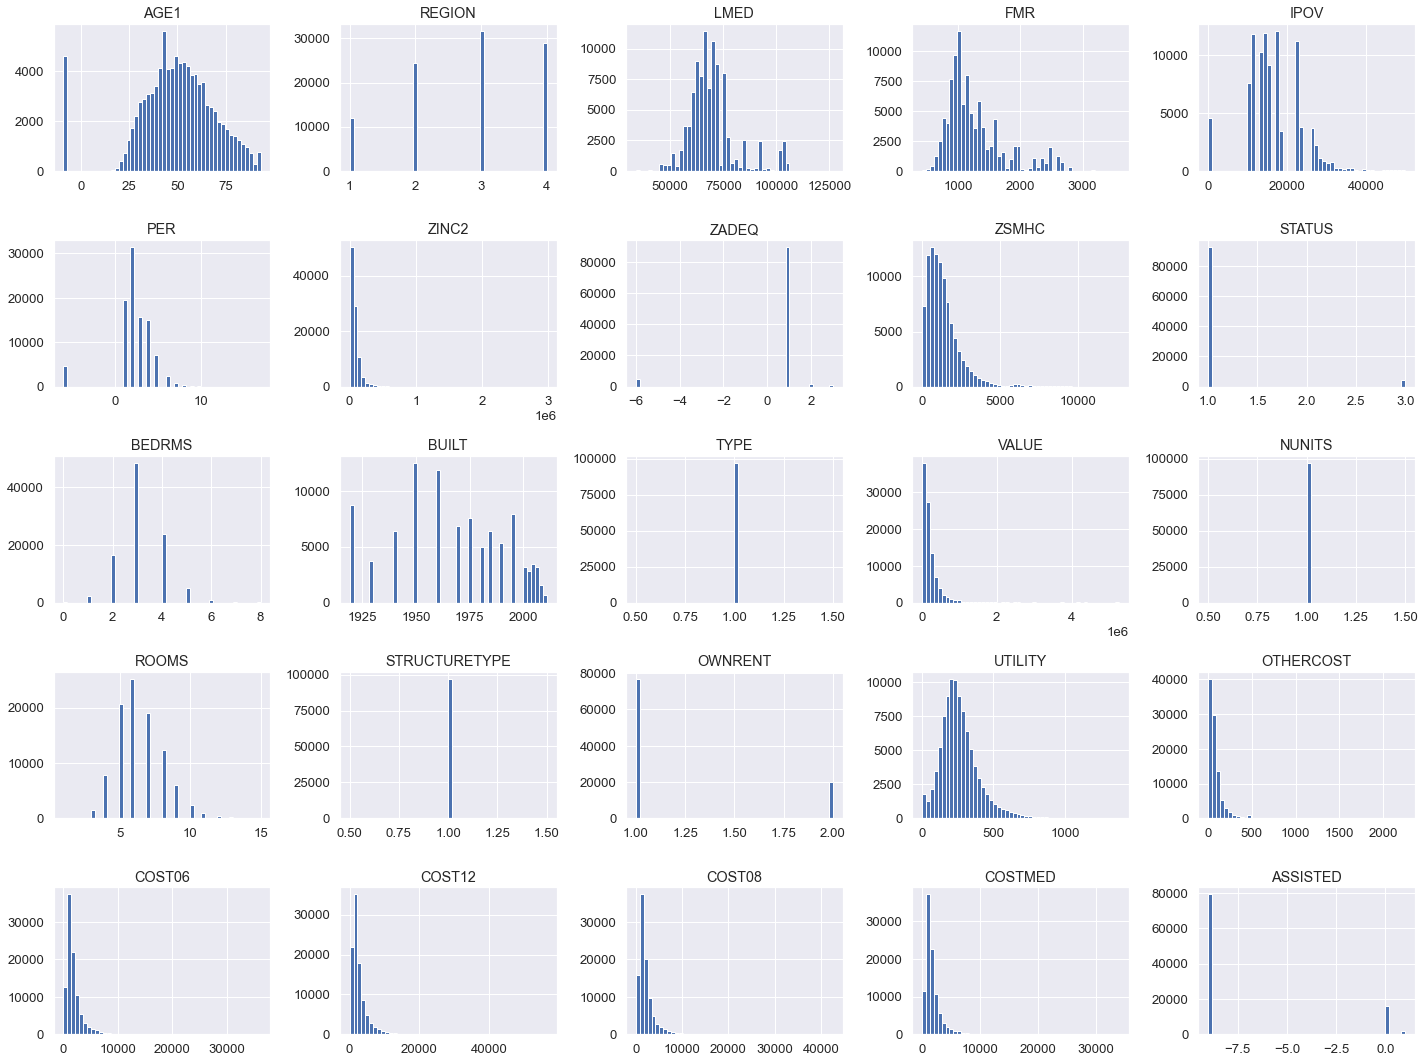

In [15]:
df1a.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

In [16]:
df1a.describe(include='all')

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,IPOV,PER,ZINC2,ZADEQ,ZSMHC,STATUS,BEDRMS,BUILT,TYPE,VALUE,NUNITS,ROOMS,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED
count,97199,97199.000000,97199.0,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,9.719900e+04,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.0,9.719900e+04,97199.0,97199.000000,97199.0,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000
unique,97199,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,'376000014086',NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,42592.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,49.466209,NaN,2.801438,69564.176741,1263.172728,16623.397761,2.303378,7.657368e+04,0.712847,1343.603257,1.094569,3.158356,1968.444439,1.0,2.114055e+05,1.0,6.409726,1.0,1.207739,261.737048,77.402657,1928.476765,2744.836369,2183.840580,1838.391819,-7.308871
std,NaN,20.311459,NaN,1.000996,11363.282757,466.143109,6876.018447,2.351663,8.668939e+04,1.517711,1127.772090,0.424495,0.891017,26.250446,0.0,2.904569e+05,0.0,1.674983,0.0,0.405691,136.160265,98.570584,1943.483800,3041.492317,2284.486016,1824.079523,3.545106
min,NaN,-9.000000,NaN,1.000000,33700.000000,419.000000,-9.000000,-6.000000,-3.440000e+02,-6.000000,-6.000000,1.000000,0.000000,1919.000000,1.0,-6.000000e+00,1.0,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,NaN,38.000000,NaN,2.000000,62800.000000,975.000000,13364.000000,2.000000,2.564850e+04,1.000000,594.000000,1.000000,3.000000,1950.000000,1.0,5.500000e+04,1.0,5.000000,1.0,1.000000,174.500000,22.500000,943.230586,1191.176204,1023.429783,913.876999,-9.000000
50%,NaN,50.000000,NaN,3.000000,67985.000000,1134.000000,14942.000000,2.000000,5.598200e+04,1.000000,1102.000000,1.000000,3.000000,1970.000000,1.0,1.480000e+05,1.0,6.000000,1.0,1.000000,242.000000,54.500000,1416.762139,1922.718539,1575.000000,1360.472331,-9.000000
75%,NaN,63.000000,NaN,4.000000,72403.000000,1430.000000,22488.000000,4.000000,9.998750e+04,1.000000,1756.000000,1.000000,4.000000,1990.000000,1.0,2.600000e+05,1.0,7.000000,1.0,1.000000,324.666667,100.000000,2227.545318,3196.499243,2525.807618,2121.662497,-9.000000


In [17]:
df1a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97199 entries, 0 to 145530
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CONTROL        97199 non-null  object 
 1   AGE1           97199 non-null  int64  
 2   METRO3         97199 non-null  object 
 3   REGION         97199 non-null  int64  
 4   LMED           97199 non-null  int64  
 5   FMR            97199 non-null  int64  
 6   IPOV           97199 non-null  int64  
 7   PER            97199 non-null  int64  
 8   ZINC2          97199 non-null  int64  
 9   ZADEQ          97199 non-null  int64  
 10  ZSMHC          97199 non-null  int64  
 11  STATUS         97199 non-null  int64  
 12  BEDRMS         97199 non-null  int64  
 13  BUILT          97199 non-null  int64  
 14  TYPE           97199 non-null  int64  
 15  VALUE          97199 non-null  int64  
 16  NUNITS         97199 non-null  int64  
 17  ROOMS          97199 non-null  int64  
 18  STRUC

In [18]:
df1a

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,IPOV,PER,ZINC2,ZADEQ,ZSMHC,STATUS,BEDRMS,BUILT,TYPE,VALUE,NUNITS,ROOMS,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED
0,'036000001146',34,2,4,84200,2580,17849,3,159972,1,4240,1,4,2002,1,720000,1,8,1,1,300.000000,248.333333,5333.420736,8113.742961,6203.127772,5026.613323,-9
1,'036000001147',43,2,4,84200,2241,22629,4,156772,1,3502,1,3,2002,1,550000,1,5,1,1,256.000000,362.500000,4273.775100,6397.632355,4938.134641,4039.408326,-9
2,'036000001149',60,2,4,84200,2577,17399,3,1488496,1,5014,1,5,2001,1,720000,1,11,1,1,233.000000,180.000000,5198.087403,7978.409628,6067.794439,4891.279990,-9
3,'036000001150',37,2,4,84200,2241,14985,2,124944,1,4609,1,3,2001,1,450000,1,5,1,1,152.000000,290.000000,3432.679627,5170.381018,3976.246524,3240.924994,-9
4,'036000001151',33,2,4,84200,2580,22557,4,149972,1,4891,1,4,1995,1,700000,1,9,1,1,656.166667,181.666667,5490.001642,8193.092694,6335.550149,5191.716657,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145525,'999900022228',48,1,1,64200,1403,27127,5,35164,1,1161,1,2,1990,1,-6,1,5,1,2,61.000000,0.000000,1161.000000,1161.000000,1161.000000,1161.000000,0
145526,'999900022229',30,1,3,69100,891,17960,3,800,1,543,1,2,2010,1,-6,1,5,1,2,142.500000,0.000000,543.000000,543.000000,543.000000,543.000000,0
145527,'999900022230',80,1,4,74900,1406,17504,3,67000,1,301,1,2,1920,1,-6,1,4,1,2,62.000000,5.583333,301.000000,301.000000,301.000000,301.000000,0
145528,'999900022231',56,3,4,67985,1615,23524,4,66982,1,1622,1,3,1950,1,350000,1,6,1,1,227.583333,87.500000,2641.167488,3992.713014,3063.941741,2492.024995,-9


In [19]:
df1a.reset_index(drop=True, inplace=True)

In [20]:
df1a

,CONTROL,AGE1,METRO3,REGION,LMED,FMR,IPOV,PER,ZINC2,ZADEQ,ZSMHC,STATUS,BEDRMS,BUILT,TYPE,VALUE,NUNITS,ROOMS,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED
0,'036000001146',34,2,4,84200,2580,17849,3,159972,1,4240,1,4,2002,1,720000,1,8,1,1,300.000000,248.333333,5333.420736,8113.742961,6203.127772,5026.613323,-9
1,'036000001147',43,2,4,84200,2241,22629,4,156772,1,3502,1,3,2002,1,550000,1,5,1,1,256.000000,362.500000,4273.775100,6397.632355,4938.134641,4039.408326,-9
2,'036000001149',60,2,4,84200,2577,17399,3,1488496,1,5014,1,5,2001,1,720000,1,11,1,1,233.000000,180.000000,5198.087403,7978.409628,6067.794439,4891.279990,-9
3,'036000001150',37,2,4,84200,2241,14985,2,124944,1,4609,1,3,2001,1,450000,1,5,1,1,152.000000,290.000000,3432.679627,5170.381018,3976.246524,3240.924994,-9
4,'036000001151',33,2,4,84200,2580,22557,4,149972,1,4891,1,4,1995,1,700000,1,9,1,1,656.166667,181.666667,5490.001642,8193.092694,6335.550149,5191.716657,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97194,'999900022228',48,1,1,64200,1403,27127,5,35164,1,1161,1,2,1990,1,-6,1,5,1,2,61.000000,0.000000,1161.000000,1161.000000,1161.000000,1161.000000,0
97195,'999900022229',30,1,3,69100,891,17960,3,800,1,543,1,2,2010,1,-6,1,5,1,2,142.500000,0.000000,543.000000,543.000000,543.000000,543.000000,0
97196,'999900022230',80,1,4,74900,1406,17504,3,67000,1,301,1,2,1920,1,-6,1,4,1,2,62.000000,5.583333,301.000000,301.000000,301.000000,301.000000,0
97197,'999900022231',56,3,4,67985,1615,23524,4,66982,1,1622,1,3,1950,1,350000,1,6,1,1,227.583333,87.500000,2641.167488,3992.713014,3063.941741,2492.024995,-9


In [21]:
df1a.corr()

,AGE1,REGION,LMED,FMR,IPOV,PER,ZINC2,ZADEQ,ZSMHC,STATUS,BEDRMS,BUILT,TYPE,VALUE,NUNITS,ROOMS,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED
AGE1,1.000000,-0.030955,0.027561,0.030896,0.094115,0.336538,0.046371,0.629915,0.027638,-0.641274,0.012849,-0.062295,NaN,0.137732,NaN,0.066275,NaN,-0.293108,0.110868,0.118070,0.090690,0.108741,0.098305,0.087281,-0.141489
REGION,-0.030955,1.000000,0.196705,0.520480,0.052567,0.037338,0.071225,-0.001720,0.167809,0.000706,0.034816,0.185210,NaN,0.171838,NaN,-0.014606,NaN,0.085058,-0.039971,0.106464,0.210810,0.198075,0.205733,0.212949,0.087393
LMED,0.027561,0.196705,1.000000,0.695302,0.078362,0.072938,0.197487,0.036113,0.317332,-0.041163,0.052675,-0.069982,NaN,0.345398,NaN,0.062643,NaN,0.000734,0.035877,0.136610,0.383990,0.372739,0.379718,0.385690,0.011446
FMR,0.030896,0.520480,0.695302,1.000000,0.201313,0.171381,0.267816,0.049625,0.442831,-0.056931,0.407749,0.071314,NaN,0.464327,NaN,0.290822,NaN,-0.059917,0.161919,0.223425,0.514116,0.499745,0.508685,0.516264,-0.042270
IPOV,0.094115,0.052567,0.078362,0.201313,1.000000,0.939215,0.254810,0.531811,0.348631,-0.538887,0.301361,0.089366,NaN,0.065034,NaN,0.244578,NaN,-0.012364,0.314848,0.015561,0.096505,0.085648,0.092088,0.098409,0.124868
PER,0.336538,0.037338,0.072938,0.171381,0.939215,1.000000,0.264924,0.775399,0.357018,-0.786610,0.250235,0.076472,NaN,0.079957,NaN,0.217438,NaN,-0.071441,0.306349,0.036239,0.096966,0.091446,0.094772,0.097889,0.126562
ZINC2,0.046371,0.071225,0.197487,0.267816,0.254810,0.264924,1.000000,0.183488,0.506021,-0.196801,0.273090,0.147503,NaN,0.417900,NaN,0.344084,NaN,-0.195138,0.286467,0.271081,0.432566,0.430515,0.432179,0.432526,-0.155379
ZADEQ,0.629915,-0.001720,0.036113,0.049625,0.531811,0.775399,0.183488,1.000000,0.253351,-0.985366,0.052235,0.010289,NaN,0.058190,NaN,0.068893,NaN,-0.129494,0.174207,0.043782,0.044549,0.049925,0.046836,0.043517,0.116745
ZSMHC,0.027638,0.167809,0.317332,0.442831,0.348631,0.357018,0.506021,0.253351,1.000000,-0.266603,0.331331,0.184516,NaN,0.541950,NaN,0.378978,NaN,-0.164298,0.411553,0.381991,0.606042,0.587110,0.598811,0.608940,-0.105981
STATUS,-0.641274,0.000706,-0.041163,-0.056931,-0.538887,-0.786610,-0.196801,-0.985366,-0.266603,1.000000,-0.063313,-0.026438,NaN,-0.069018,NaN,-0.081467,NaN,0.143048,-0.181139,-0.053831,-0.054981,-0.060584,-0.057373,-0.053897,-0.106274


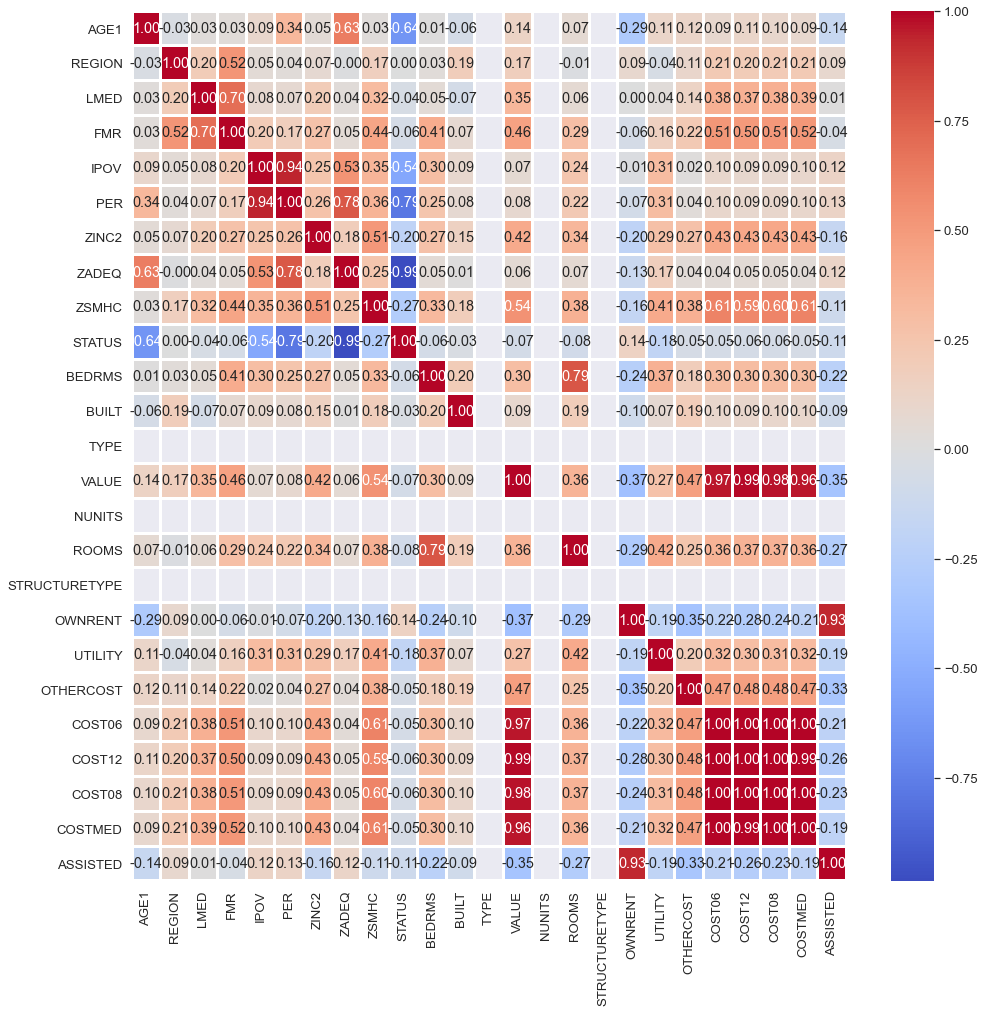

In [22]:
plt.figure(figsize=(16,16))
sns.heatmap(df1a.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [23]:
df1a.isnull().sum()

CONTROL          0
AGE1             0
METRO3           0
REGION           0
LMED             0
FMR              0
IPOV             0
PER              0
ZINC2            0
ZADEQ            0
ZSMHC            0
STATUS           0
BEDRMS           0
BUILT            0
TYPE             0
VALUE            0
NUNITS           0
ROOMS            0
STRUCTURETYPE    0
OWNRENT          0
UTILITY          0
OTHERCOST        0
COST06           0
COST12           0
COST08           0
COSTMED          0
ASSISTED         0
dtype: int64

### Treat Duplicate Values

In [24]:
df1a.duplicated(keep='first').sum()

0

### Treat Outliers

In [25]:
df1a.describe()

,AGE1,REGION,LMED,FMR,IPOV,PER,ZINC2,ZADEQ,ZSMHC,STATUS,BEDRMS,BUILT,TYPE,VALUE,NUNITS,ROOMS,STRUCTURETYPE,OWNRENT,UTILITY,OTHERCOST,COST06,COST12,COST08,COSTMED,ASSISTED
count,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,9.719900e+04,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.0,9.719900e+04,97199.0,97199.000000,97199.0,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000,97199.000000
mean,49.466209,2.801438,69564.176741,1263.172728,16623.397761,2.303378,7.657368e+04,0.712847,1343.603257,1.094569,3.158356,1968.444439,1.0,2.114055e+05,1.0,6.409726,1.0,1.207739,261.737048,77.402657,1928.476765,2744.836369,2183.840580,1838.391819,-7.308871
std,20.311459,1.000996,11363.282757,466.143109,6876.018447,2.351663,8.668939e+04,1.517711,1127.772090,0.424495,0.891017,26.250446,0.0,2.904569e+05,0.0,1.674983,0.0,0.405691,136.160265,98.570584,1943.483800,3041.492317,2284.486016,1824.079523,3.545106
min,-9.000000,1.000000,33700.000000,419.000000,-9.000000,-6.000000,-3.440000e+02,-6.000000,-6.000000,1.000000,0.000000,1919.000000,1.0,-6.000000e+00,1.0,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.000000
25%,38.000000,2.000000,62800.000000,975.000000,13364.000000,2.000000,2.564850e+04,1.000000,594.000000,1.000000,3.000000,1950.000000,1.0,5.500000e+04,1.0,5.000000,1.0,1.000000,174.500000,22.500000,943.230586,1191.176204,1023.429783,913.876999,-9.000000
50%,50.000000,3.000000,67985.000000,1134.000000,14942.000000,2.000000,5.598200e+04,1.000000,1102.000000,1.000000,3.000000,1970.000000,1.0,1.480000e+05,1.0,6.000000,1.0,1.000000,242.000000,54.500000,1416.762139,1922.718539,1575.000000,1360.472331,-9.000000
75%,63.000000,4.000000,72403.000000,1430.000000,22488.000000,4.000000,9.998750e+04,1.000000,1756.000000,1.000000,4.000000,1990.000000,1.0,2.600000e+05,1.0,7.000000,1.0,1.000000,324.666667,100.000000,2227.545318,3196.499243,2525.807618,2121.662497,-9.000000
max,93.000000,4.000000,126600.000000,3586.000000,49801.000000,17.000000,2.977104e+06,3.000000,12595.000000,3.000000,8.000000,2011.000000,1.0,5.264699e+06,1.0,15.000000,1.0,2.000000,1377.833333,2250.000000,36203.117870,56533.061810,42562.486980,33959.716920,1.000000


### Drop unwanted features

In [26]:
df1a.columns

Index(['CONTROL', 'AGE1', 'METRO3', 'REGION', 'LMED', 'FMR', 'IPOV', 'PER', 'ZINC2', 'ZADEQ', 'ZSMHC', 'STATUS', 'BEDRMS', 'BUILT', 'TYPE', 'VALUE', 'NUNITS', 'ROOMS', 'STRUCTURETYPE', 'OWNRENT', 'UTILITY', 'OTHERCOST', 'COST06', 'COST12', 'COST08', 'COSTMED', 'ASSISTED'], dtype='object')

Drop all strings and some categoricals

In [27]:
df1a.drop(['CONTROL','METRO3', 'REGION','BUILT','STATUS','TYPE','NUNITS','STRUCTURETYPE',
          'ZADEQ','OWNRENT','COST06', 'COST12', 'COST08','ASSISTED'],axis=1,inplace=True)

In [28]:
df1a

,AGE1,LMED,FMR,IPOV,PER,ZINC2,ZSMHC,BEDRMS,VALUE,ROOMS,UTILITY,OTHERCOST,COSTMED
0,34,84200,2580,17849,3,159972,4240,4,720000,8,300.000000,248.333333,5026.613323
1,43,84200,2241,22629,4,156772,3502,3,550000,5,256.000000,362.500000,4039.408326
2,60,84200,2577,17399,3,1488496,5014,5,720000,11,233.000000,180.000000,4891.279990
3,37,84200,2241,14985,2,124944,4609,3,450000,5,152.000000,290.000000,3240.924994
4,33,84200,2580,22557,4,149972,4891,4,700000,9,656.166667,181.666667,5191.716657
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97194,48,64200,1403,27127,5,35164,1161,2,-6,5,61.000000,0.000000,1161.000000
97195,30,69100,891,17960,3,800,543,2,-6,5,142.500000,0.000000,543.000000
97196,80,74900,1406,17504,3,67000,301,2,-6,4,62.000000,5.583333,301.000000
97197,56,67985,1615,23524,4,66982,1622,3,350000,6,227.583333,87.500000,2492.024995


In [29]:
#Remove negative values

In [30]:
df3 = df1a[df1a["VALUE"] >= 0 ]

In [31]:
df3

,AGE1,LMED,FMR,IPOV,PER,ZINC2,ZSMHC,BEDRMS,VALUE,ROOMS,UTILITY,OTHERCOST,COSTMED
0,34,84200,2580,17849,3,159972,4240,4,720000,8,300.000000,248.333333,5026.613323
1,43,84200,2241,22629,4,156772,3502,3,550000,5,256.000000,362.500000,4039.408326
2,60,84200,2577,17399,3,1488496,5014,5,720000,11,233.000000,180.000000,4891.279990
3,37,84200,2241,14985,2,124944,4609,3,450000,5,152.000000,290.000000,3240.924994
4,33,84200,2580,22557,4,149972,4891,4,700000,9,656.166667,181.666667,5191.716657
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97174,40,57215,619,18012,3,77982,392,1,250000,2,0.000000,100.000000,1654.958330
97180,49,62806,659,14895,2,125564,11,1,44000,3,0.000000,11.000000,284.672666
97189,61,67715,648,11536,1,2200,245,1,105000,3,107.666667,26.250000,786.999165
97192,70,53300,662,13487,2,77200,285,1,30000,4,93.000000,108.333333,387.928333


In [32]:
df3["VALUE"].value_counts()

200000    3460
150000    3175
250000    2590
100000    2502
300000    2487
          ... 
127400       1
203148       1
51471        1
495          1
426000       1
Name: VALUE, Length: 1699, dtype: int64

In [33]:
df3.columns

Index(['AGE1', 'LMED', 'FMR', 'IPOV', 'PER', 'ZINC2', 'ZSMHC', 'BEDRMS', 'VALUE', 'ROOMS', 'UTILITY', 'OTHERCOST', 'COSTMED'], dtype='object')

In [34]:
df3 = df3[['AGE1', 'LMED', 'FMR', 'IPOV', 'PER', 'ZINC2', 'ZSMHC', 'BEDRMS','ROOMS', 'UTILITY', 'OTHERCOST', 'COSTMED', 'VALUE']]

In [35]:
df3

,AGE1,LMED,FMR,IPOV,PER,ZINC2,ZSMHC,BEDRMS,ROOMS,UTILITY,OTHERCOST,COSTMED,VALUE
0,34,84200,2580,17849,3,159972,4240,4,8,300.000000,248.333333,5026.613323,720000
1,43,84200,2241,22629,4,156772,3502,3,5,256.000000,362.500000,4039.408326,550000
2,60,84200,2577,17399,3,1488496,5014,5,11,233.000000,180.000000,4891.279990,720000
3,37,84200,2241,14985,2,124944,4609,3,5,152.000000,290.000000,3240.924994,450000
4,33,84200,2580,22557,4,149972,4891,4,9,656.166667,181.666667,5191.716657,700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97174,40,57215,619,18012,3,77982,392,1,2,0.000000,100.000000,1654.958330,250000
97180,49,62806,659,14895,2,125564,11,1,3,0.000000,11.000000,284.672666,44000
97189,61,67715,648,11536,1,2200,245,1,3,107.666667,26.250000,786.999165,105000
97192,70,53300,662,13487,2,77200,285,1,4,93.000000,108.333333,387.928333,30000


In [36]:
df3.reset_index(inplace=True, drop=True)

In [37]:
df3

,AGE1,LMED,FMR,IPOV,PER,ZINC2,ZSMHC,BEDRMS,ROOMS,UTILITY,OTHERCOST,COSTMED,VALUE
0,34,84200,2580,17849,3,159972,4240,4,8,300.000000,248.333333,5026.613323,720000
1,43,84200,2241,22629,4,156772,3502,3,5,256.000000,362.500000,4039.408326,550000
2,60,84200,2577,17399,3,1488496,5014,5,11,233.000000,180.000000,4891.279990,720000
3,37,84200,2241,14985,2,124944,4609,3,5,152.000000,290.000000,3240.924994,450000
4,33,84200,2580,22557,4,149972,4891,4,9,656.166667,181.666667,5191.716657,700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77002,40,57215,619,18012,3,77982,392,1,2,0.000000,100.000000,1654.958330,250000
77003,49,62806,659,14895,2,125564,11,1,3,0.000000,11.000000,284.672666,44000
77004,61,67715,648,11536,1,2200,245,1,3,107.666667,26.250000,786.999165,105000
77005,70,53300,662,13487,2,77200,285,1,4,93.000000,108.333333,387.928333,30000


### Create and save processed dataset

In [38]:
#df3.to_csv("house.csv",index=False)

### Load Data

In [39]:
df = pd.read_csv("house.csv")

In [40]:
df

,AGE1,LMED,FMR,IPOV,PER,ZINC2,ZSMHC,BEDRMS,ROOMS,UTILITY,OTHERCOST,COSTMED,VALUE
0,34,84200,2580,17849,3,159972,4240,4,8,300.000000,248.333333,5026.613323,720000
1,43,84200,2241,22629,4,156772,3502,3,5,256.000000,362.500000,4039.408326,550000
2,60,84200,2577,17399,3,1488496,5014,5,11,233.000000,180.000000,4891.279990,720000
3,37,84200,2241,14985,2,124944,4609,3,5,152.000000,290.000000,3240.924994,450000
4,33,84200,2580,22557,4,149972,4891,4,9,656.166667,181.666667,5191.716657,700000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
77002,40,57215,619,18012,3,77982,392,1,2,0.000000,100.000000,1654.958330,250000
77003,49,62806,659,14895,2,125564,11,1,3,0.000000,11.000000,284.672666,44000
77004,61,67715,648,11536,1,2200,245,1,3,107.666667,26.250000,786.999165,105000
77005,70,53300,662,13487,2,77200,285,1,4,93.000000,108.333333,387.928333,30000


In [41]:
df.shape

(77007, 13)

In [42]:
df1 = df.sample(frac=0.13, random_state=0)

In [43]:
df1.shape

(10011, 13)

In [44]:
df1

,AGE1,LMED,FMR,IPOV,PER,ZINC2,ZSMHC,BEDRMS,ROOMS,UTILITY,OTHERCOST,COSTMED,VALUE
58408,53,75159,1518,15026,2,78010,2197,3,6,180.666667,62.500000,802.951665,90000
71564,54,74900,1999,17454,3,134000,532,3,6,250.333333,123.333333,2550.608328,350000
36241,29,58300,1010,17849,3,110657,1432,3,6,211.000000,74.000000,1149.556831,139000
59739,61,75202,1520,14895,2,229972,2116,3,6,324.000000,100.000000,4155.899992,600000
32138,67,64028,963,13403,2,59286,1027,3,7,194.750000,41.000000,1255.802664,164000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11817,67,67109,779,13445,2,20400,658,2,5,253.666667,62.500000,502.761666,30000
2510,-9,60802,1010,-9,-6,-6,-6,4,8,130.916667,100.000000,666.304999,70000
23898,66,61864,882,13364,2,189964,1342,3,10,637.666667,91.666667,4834.423324,660000
14750,30,69100,1160,22694,4,88000,816,3,6,438.916667,36.250000,1377.042498,145000


### Train Test Split

In [45]:
X = df1.iloc[:,0:12]
y = df1.iloc[:,12]

In [46]:
X

,AGE1,LMED,FMR,IPOV,PER,ZINC2,ZSMHC,BEDRMS,ROOMS,UTILITY,OTHERCOST,COSTMED
58408,53,75159,1518,15026,2,78010,2197,3,6,180.666667,62.500000,802.951665
71564,54,74900,1999,17454,3,134000,532,3,6,250.333333,123.333333,2550.608328
36241,29,58300,1010,17849,3,110657,1432,3,6,211.000000,74.000000,1149.556831
59739,61,75202,1520,14895,2,229972,2116,3,6,324.000000,100.000000,4155.899992
32138,67,64028,963,13403,2,59286,1027,3,7,194.750000,41.000000,1255.802664
...,...,...,...,...,...,...,...,...,...,...,...,...
11817,67,67109,779,13445,2,20400,658,2,5,253.666667,62.500000,502.761666
2510,-9,60802,1010,-9,-6,-6,-6,4,8,130.916667,100.000000,666.304999
23898,66,61864,882,13364,2,189964,1342,3,10,637.666667,91.666667,4834.423324
14750,30,69100,1160,22694,4,88000,816,3,6,438.916667,36.250000,1377.042498


In [47]:
X.values, y.values

(array([[5.30000000e+01, 7.51590000e+04, 1.51800000e+03, ...,
         1.80666667e+02, 6.25000000e+01, 8.02951665e+02],
        [5.40000000e+01, 7.49000000e+04, 1.99900000e+03, ...,
         2.50333333e+02, 1.23333333e+02, 2.55060833e+03],
        [2.90000000e+01, 5.83000000e+04, 1.01000000e+03, ...,
         2.11000000e+02, 7.40000000e+01, 1.14955683e+03],
        ...,
        [6.60000000e+01, 6.18640000e+04, 8.82000000e+02, ...,
         6.37666667e+02, 9.16666667e+01, 4.83442332e+03],
        [3.00000000e+01, 6.91000000e+04, 1.16000000e+03, ...,
         4.38916667e+02, 3.62500000e+01, 1.37704250e+03],
        [6.70000000e+01, 5.19130000e+04, 8.48000000e+02, ...,
         3.29000000e+02, 4.37500000e+01, 1.46122083e+03]]),
 array([ 90000, 350000, 139000, ..., 660000, 145000, 175000], dtype=int64))

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=0)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8008, 12), (2003, 12), (8008,), (2003,))

### Feature Scaling

In [50]:
X_train

array([[5.00000000e+01, 6.91320000e+04, 1.01700000e+03, ...,
        2.57000000e+02, 1.16666667e+02, 1.43103833e+03],
       [5.90000000e+01, 7.52020000e+04, 1.52000000e+03, ...,
        1.97666667e+02, 0.00000000e+00, 7.57451665e+02],
       [3.70000000e+01, 6.99000000e+04, 1.31900000e+03, ...,
        2.57000000e+02, 7.37500000e+01, 2.16560083e+03],
       ...,
       [4.80000000e+01, 6.91000000e+04, 1.16000000e+03, ...,
        4.50000000e+02, 8.33333333e+01, 1.44764883e+03],
       [3.90000000e+01, 6.55000000e+04, 1.59600000e+03, ...,
        4.02000000e+02, 5.00000000e+01, 2.31795000e+03],
       [3.70000000e+01, 6.80420000e+04, 1.06800000e+03, ...,
        3.67333333e+02, 6.50000000e+01, 1.42750666e+03]])

In [51]:
scaler = StandardScaler()

In [52]:
X_train_scaled = scaler.fit_transform(X_train)

In [53]:
X_test_scaled = scaler.transform(X_test)

In [54]:
X_train_scaled

array([[-0.12068029, -0.03780161, -0.55955832, ..., -0.13124982,
         0.22176716, -0.30580565],
       [ 0.34964198,  0.50132567,  0.51414939, ..., -0.57334221,
        -0.95056768, -0.63667274],
       [-0.80003467,  0.03041087,  0.08509323, ..., -0.13124982,
        -0.20948458,  0.05501289],
       ...,
       [-0.22519635, -0.04064379, -0.25430941, ...,  1.30679228,
        -0.11318565, -0.29764654],
       [-0.69551861, -0.36038979,  0.67637958, ...,  0.9491445 ,
        -0.44813846,  0.1298471 ],
       [-0.80003467, -0.13461359, -0.45069332, ...,  0.69084333,
        -0.2974097 , -0.30754041]])

In [55]:
X_test_scaled

array([[ 0.61093213,  0.66102103, -0.43148185, ...,  0.82620308,
        -0.53187666, -0.34063023],
       [ 0.0360938 , -0.04064379, -0.25430941, ...,  0.09228004,
         0.47298177, -0.34864045],
       [-0.06842226, -1.08790075, -0.51046234, ...,  0.19659397,
        -0.12993329, -0.27083288],
       ...,
       [ 0.19286789,  1.30051303,  2.05320158, ...,  1.38316498,
         1.38572818,  1.01190256],
       [-0.43422847, -1.56716447, -1.33015172, ..., -1.49478197,
        -0.89530046, -0.90246965],
       [-0.27745438,  2.01994152,  1.30181965, ..., -0.58576054,
         0.93354188,  1.47103721]])

### Model Training

### Using XGBoost (Scikit-Learn)

### Using RandomSearchCV

In [56]:
model = XGBRegressor(random_state=0, n_estimators=100, objective='reg:squarederror')

In [57]:
parameters = {'max_depth': np.arange(3,10,1),
              'learning rate': np.arange(0.05,0.3,0.03),
              'n_estimators':np.arange(100,1000,100),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2),
              'subsample':np.arange(0.5,0.9,0.1),
              'colsample_bytree':np.arange(0.5,0.9,0.1)
             }

In [58]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 20, 
                           n_jobs=-1, scoring='neg_mean_squared_error')

In [59]:
randm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.5, 0.6, 0.7, 0.8]),
                                        'gamma': array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48]),
                                        'learning rate': array([0.05, 0.08, 0.11, 0.14, 0.17, 0.2 , 0.23, 0.26, 0.29]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([1, 2, 3]),
                                        'n_estimators': array([100, 200, 300, 400, 500, 600, 700, 800, 900]),
                                        'subsample': array([0.5, 0.6, 0.7, 0.8])},
                   scoring='neg_mean_squared_error')

In [60]:
randm.best_estimator_

XGBRegressor(colsample_bytree=0.7999999999999999, gamma=8, learning rate=0.2,
             min_child_weight=3, n_estimators=300, objective='reg:squarederror',
             subsample=0.6)

In [61]:
randm.best_score_

-410930042.38920146

In [62]:
randm.best_params_

{'subsample': 0.6,
 'n_estimators': 300,
 'min_child_weight': 3,
 'max_depth': 3,
 'learning rate': 0.2,
 'gamma': 8,
 'colsample_bytree': 0.7999999999999999}

In [63]:
xgbmodel = XGBRegressor(random_state=0, n_estimators=600, objective='reg:squarederror',subsample=0.6,
                        max_depth=3,learning_rate=0.2,gamma=8,colsample_bytree=0.8,min_child_weight=3)

In [64]:
xgbmodel.fit(X_train_scaled,y_train,eval_set=[(X_test_scaled,y_test)],eval_metric='rmse',early_stopping_rounds=10)

[0]	validation_0-rmse:306347
Will train until validation_0-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:246520
[2]	validation_0-rmse:198875
[3]	validation_0-rmse:161143
[4]	validation_0-rmse:131475
[5]	validation_0-rmse:106631
[6]	validation_0-rmse:93525.4
[7]	validation_0-rmse:84150.6
[8]	validation_0-rmse:70259.1
[9]	validation_0-rmse:59517.9
[10]	validation_0-rmse:51879
[11]	validation_0-rmse:45746.2
[12]	validation_0-rmse:43873.9
[13]	validation_0-rmse:40069.6
[14]	validation_0-rmse:39038.6
[15]	validation_0-rmse:36270
[16]	validation_0-rmse:34093.7
[17]	validation_0-rmse:33658.4
[18]	validation_0-rmse:31805.3
[19]	validation_0-rmse:30040.8
[20]	validation_0-rmse:29616
[21]	validation_0-rmse:29143.6
[22]	validation_0-rmse:28868.6
[23]	validation_0-rmse:27960.5
[24]	validation_0-rmse:27030.5
[25]	validation_0-rmse:26077.5
[26]	validation_0-rmse:25720
[27]	validation_0-rmse:25066.7
[28]	validation_0-rmse:24045.1
[29]	validation_0-rmse:23355.5
[30]	validation_0-rmse:22645


[259]	validation_0-rmse:8298.65
[260]	validation_0-rmse:8288.64
[261]	validation_0-rmse:8285.11
[262]	validation_0-rmse:8284.73
[263]	validation_0-rmse:8272.5
[264]	validation_0-rmse:8260
[265]	validation_0-rmse:8239.67
[266]	validation_0-rmse:8230.58
[267]	validation_0-rmse:8231.08
[268]	validation_0-rmse:8233.48
[269]	validation_0-rmse:8231.14
[270]	validation_0-rmse:8223.31
[271]	validation_0-rmse:8218.93
[272]	validation_0-rmse:8211.24
[273]	validation_0-rmse:8202.64
[274]	validation_0-rmse:8202.92
[275]	validation_0-rmse:8204.48
[276]	validation_0-rmse:8209.05
[277]	validation_0-rmse:8208.7
[278]	validation_0-rmse:8226.79
[279]	validation_0-rmse:8203.83
[280]	validation_0-rmse:8206
[281]	validation_0-rmse:8181.95
[282]	validation_0-rmse:8160.87
[283]	validation_0-rmse:8175.25
[284]	validation_0-rmse:8166.4
[285]	validation_0-rmse:8165.82
[286]	validation_0-rmse:8187.87
[287]	validation_0-rmse:8177.68
[288]	validation_0-rmse:8180.08
[289]	validation_0-rmse:8183.94
[290]	validation_

XGBRegressor(colsample_bytree=0.8, gamma=8, learning_rate=0.2,
             min_child_weight=3, n_estimators=600, objective='reg:squarederror',
             subsample=0.6)

In [65]:
y_pred = xgbmodel.predict(X_test_scaled)

In [66]:
y_pred

array([149618.08 , 147258.4  , 175656.98 , ..., 552318.9  ,  20316.541,
       777536.5  ], dtype=float32)

In [67]:
y_test

array([150000, 147137, 180000, ..., 550000,  22000, 750000], dtype=int64)

### Model Evaluation

In [68]:
mse = mean_squared_error(y_test,y_pred)
mse

61165427.647468194

In [69]:
rmse = np.sqrt(mse)
rmse

7820.832925428607

In [70]:
r2score = r2_score(y_test,y_pred)
r2score

0.9991812748989954

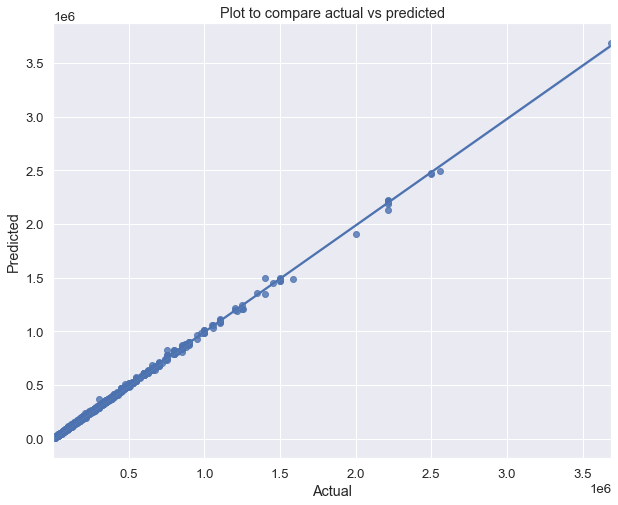

In [71]:
fig, ax = plt.subplots(figsize=(10,8))
sns.regplot(x=y_test, y=y_pred, ax=ax)
plt.title("Plot to compare actual vs predicted")
plt.ylabel("Predicted")
plt.xlabel("Actual")
plt.show()

### Available importance_types = [‘weight’, ‘gain’, ‘cover’, ‘total_gain’, ‘total_cover’]

In [72]:
X.columns

Index(['AGE1', 'LMED', 'FMR', 'IPOV', 'PER', 'ZINC2', 'ZSMHC', 'BEDRMS', 'ROOMS', 'UTILITY', 'OTHERCOST', 'COSTMED'], dtype='object')

In [73]:
xgbmodel.get_booster().feature_names = ['AGE1', 'LMED', 'FMR', 'IPOV', 'PER', 'ZINC2', 'ZSMHC', 'BEDRMS', 'ROOMS', 'UTILITY', 'OTHERCOST', 'COSTMED']

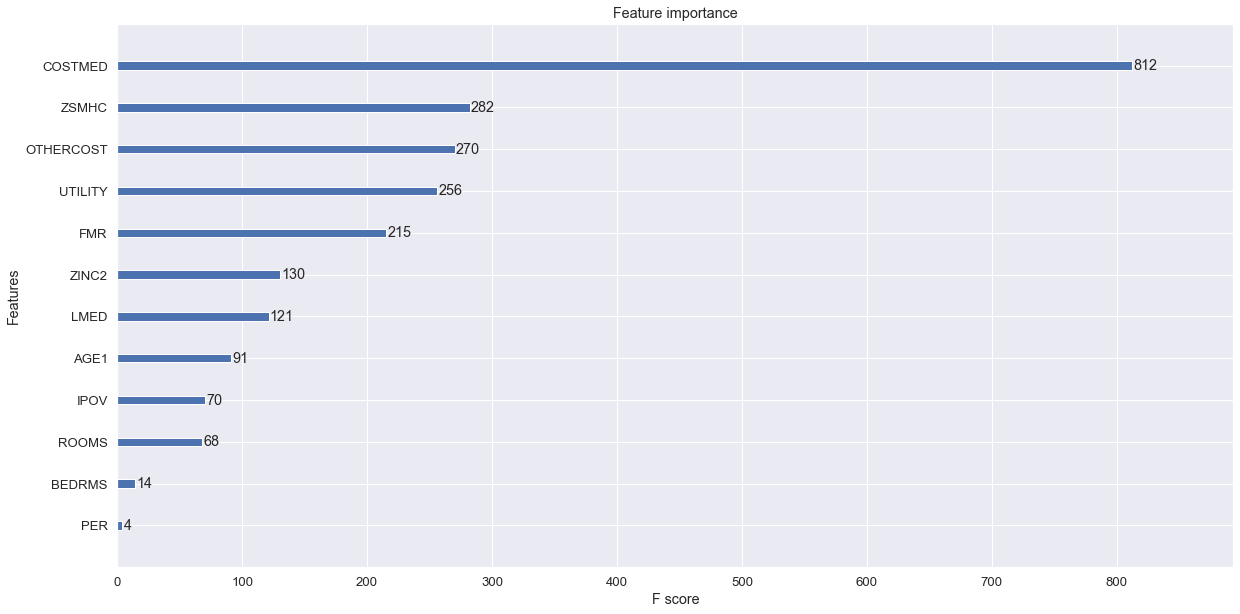

In [74]:
fig, ax = plt.subplots(figsize=(20,10))
xgb.plot_importance(xgbmodel.get_booster(),ax=ax)
plt.show()

### Cross-Validation

In [75]:
cv = cross_val_score(xgbmodel,X.values,y.values,cv=5,verbose=1,scoring='r2')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   24.2s finished


In [76]:
cv.mean()

0.9959882064388215